<a href="https://colab.research.google.com/github/niuguy/digithealthcourse/blob/master/%5B025%5DMIMIC3_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### What is unsupervised Learning?
Unsupervised learning algorithms take a set of data that contains only inputs, and find structure in the data, like grouping or clustering of data points.
https://en.wikipedia.org/wiki/Machine_learning#Unsupervised_learning
### Why Unsupervised Learning?

* It's a new perspective of looking at the data, we may call it 'advanced' data exploration technique
* Because we may want to gain some insight or do dimension reduction before we design a classifier
* It's actually how people observe the world and learn new things, thus it implies the future of machine learning.

### Main methods


#### **Principle Component Analysis（PCA）**

> Principal component analysis is a technique for feature extraction — so it combines our input variables in a specific way, then we can drop the “least important” variables while still retaining the most valuable parts of all of the variables 

refer to https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

![alt text](https://www.analyticsvidhya.com/wp-content/uploads/2016/03/2-1-e1458494877196.png)

The two major benefits of PCA

* Dimension reduction
* So we can draw a high dimension dataset with 2-D figure


#### **Clustering**
Clustering is to group the dataset into a bunch of categories. Two major clustering methods are K-means and Hierachical clustering

**K-means**

https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

![K-means](https://miro.medium.com/max/1192/1*CFW4k0pYMZUBVznPplLOcA.png)

**Hierachical Clustering**

Hierachical Clustering seeks to build a hierachy of clusters. There are two strategies:

* Agglomerative: "bottom-up" approach:
* Divisive: "top-down" approach

*Dendrogram* is a tree-like diagram that records the sequences of merges or splits.

Agglomerative 

![alt text](https://miro.medium.com/max/2338/1*PTyc1oCfBWw_OQgkd_LYgQ.png)


Divisive

![alt text](https://miro.medium.com/max/2260/1*u95933tR2qj-qhM3WhNdIQ.png)

[Understanding the concept of Hierarchical clustering Technique](https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec)

## The cases

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df_m3 = pd.read_csv('/content/drive/My Drive/Dataset/df_m3_processed.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
features = [ 'ADMISSION_TYPE',
       'MARITAL_STATUS', 'INSURANCE', 'LANGUAGE',
       'RELIGION', 'ETHNICITY', 'GENDER', 'AGE', 'CALLOUT_COUNT',
       'DIAG_COUNT', 'PRES_COUNT', 'PROC_COUNT', 'CPT_COUNT', 'LAB_COUNT',
       'INPUTS_CV_COUNT', 'INPUTS_MV_COUNT', 'OUTPUT_COUNT', 'TRANSFER_COUNT',
       'MICRO_COUNT']

In [0]:
train_X = df_m3.loc[:,features]
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)

### PCA

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=2).fit(train_X)
pca_2d = pca.transform(train_X)

In [0]:
help(PCA)

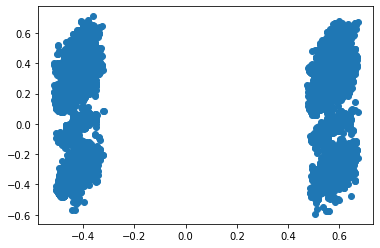

In [0]:
## Plotting
plt.figure('Reference Plot')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1])

### K-means Clustering

In [0]:
from sklearn.cluster import KMeans

In [0]:
## Let's start with 2 cluster
kmeans = KMeans(n_clusters=4)
kmeans.fit(train_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
help(KMeans)

In [0]:
## The cluster center of 
kmeans.cluster_centers_

array([[ 2.99725264e-01,  4.82302134e-01,  5.60361861e-01,
         6.87943419e-01,  7.82791488e-01,  7.91972451e-01,
         1.00000000e+00,  6.22398103e-01,  1.03921031e-01,
         1.15105566e-01,  2.57991747e-02,  4.72952399e-02,
         1.29612736e-02,  1.79363719e-02,  4.25574962e-03,
         4.12379498e-03,  9.55159559e-03,  9.44479225e-02,
         1.25778172e-02],
       [ 2.96728333e-01,  5.53935417e-01,  5.43060239e-01,
         6.90625146e-01,  2.22776480e-01,  8.43807528e-01,
        -6.56141808e-14,  6.88210456e-01,  1.07797060e-01,
         1.22648716e-01,  2.67499095e-02,  4.39767031e-02,
         1.38907791e-02,  1.82395860e-02,  4.01500339e-03,
         3.59213557e-03,  9.24648923e-03,  9.47678392e-02,
         1.46065201e-02],
       [ 3.07646141e-01,  5.61757292e-01,  5.35402413e-01,
         6.86040740e-01,  8.21683756e-01,  7.30941664e-01,
        -6.58362254e-14,  6.22352659e-01,  1.05702454e-01,
         1.18319299e-01,  2.58473631e-02,  4.20772635e-02,
    

In [0]:
kmeans.labels_

array([3, 0, 3, ..., 2, 0, 0], dtype=int32)

In [0]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3], dtype=int32)

#### Ploting kmeans labels with PCA

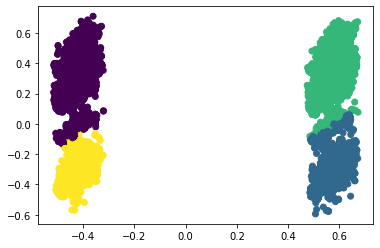

In [0]:
plt.figure('K-means with 4 clusters')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
plt.show()

### Hierarchical clustering

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [0]:
# For the 
idx = np.random.randint(len(train_X), size=100)

In [0]:
train_X[idx, :]

array([[0.        , 0.        , 0.5       , ..., 0.00784698, 0.175     ,
        0.00181818],
       [0.33333333, 0.        , 0.75      , ..., 0.00392349, 0.075     ,
        0.00363636],
       [0.33333333, 0.66666667, 0.75      , ..., 0.00294262, 0.125     ,
        0.04      ],
       ...,
       [0.33333333, 0.33333333, 0.75      , ..., 0.0013487 , 0.075     ,
        0.00636364],
       [0.33333333, 0.33333333, 0.25      , ..., 0.01233448, 0.0155    ,
        0.03076364],
       [0.33333333, 0.66666667, 0.25      , ..., 0.00098087, 0.2       ,
        0.00363636]])

In [0]:
# Do linkage/
Z = linkage(train_X[idx,:])

In [0]:
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1d condensed distance matrix
    or a 2d array of observation vectors.
    
    If y is a 1d condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents the n

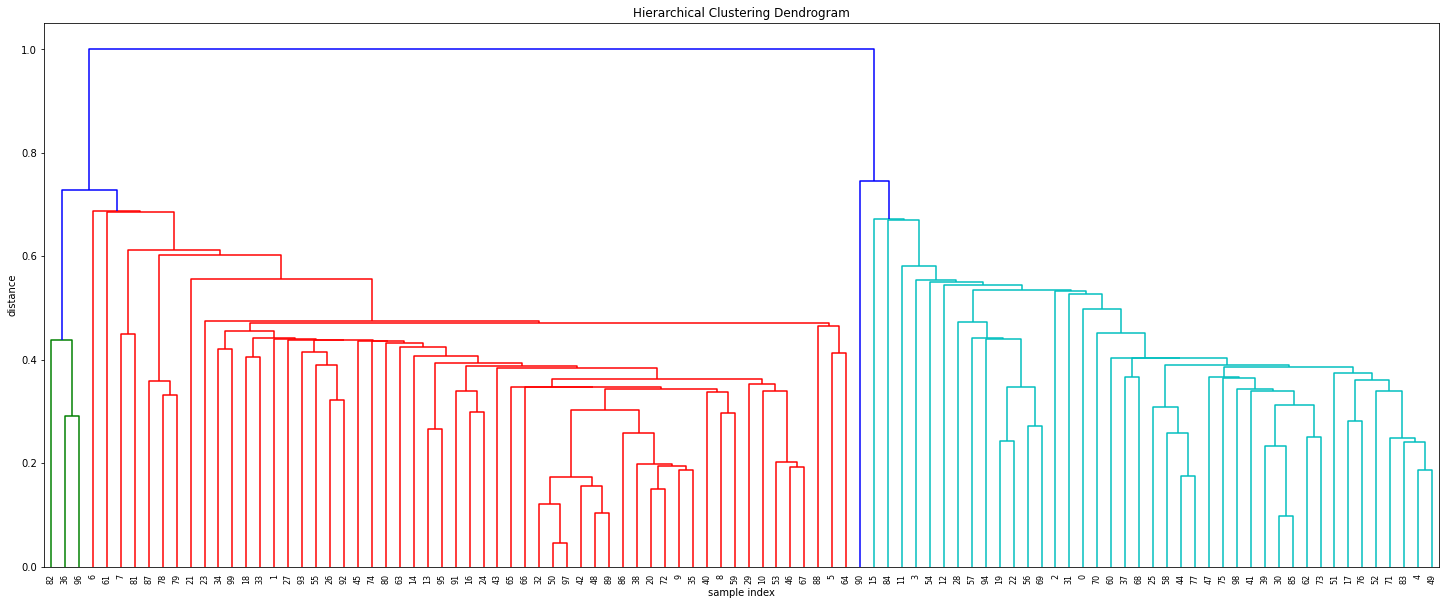

In [0]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()